In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_excel("coordinates1.xlsx")
df.head()

,Latitude,Longitude
0,42.179013,42.945078
1,42.178221,42.939312
2,42.175547,42.944820
3,42.173907,42.938588
4,42.176978,42.942560


In [20]:
data = df[['Latitude', 'Longitude']].values

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Longitude', 'Latitude']])

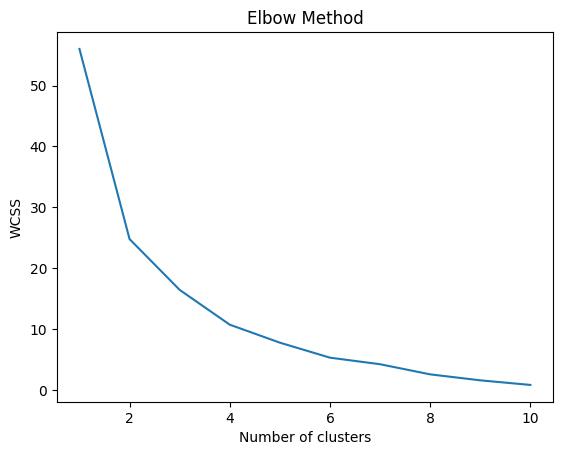

In [22]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
n_clusters=8

In [24]:
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

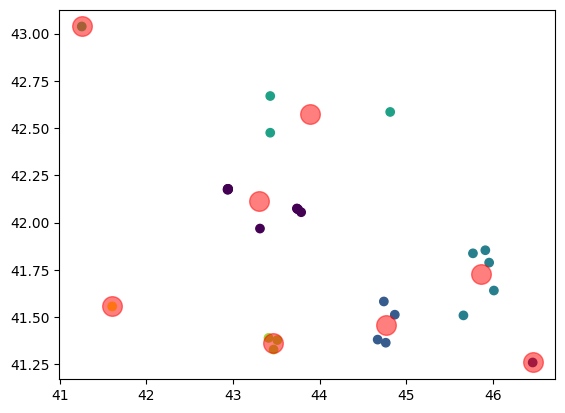

In [25]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()
